In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

## Analysis of APs from DRGs and iPSC-derived sensory neurons

We extracted the fitted APs from mouse DRGs and human iPSC-derived sensory neurons using our newly creates Software GUI Biophysical Essentials. This Notebook is a case study how to build in a random forest classifier to identify the most important features changed when using APs fitting between groups!
This will later be implemented as API call in the Software.

**What to do?**

* Load Data
* Check distribution
* Run Scaling for Principal Component Analysis
* Split the data into test and train data
* Run the Model
* Predict
* Tune Parameters

We will use this as an advanced analytical tool to be implemented in the advanced analysis tab of the biophysical essential tool when doing AP fitting

In [3]:
# Load the Data
meta_data = pd.read_csv("../Data/metadata.csv")
ap_data = pd.read_csv("../Data/apdata.csv")
ap_data

index  Unnamed: 0  Vmem [mV]  Threshold_Amplitude [mV]  t_Threshold [ms]  \
0        0          16 -50.502248                -21.093748            63.350   
1        1          17 -50.081064                -21.406253            63.800   
2        2          18 -52.393470                -20.062502            64.750   
3        3          19 -51.732562                -20.718750            61.650   
4        4          20 -50.616437                -22.281249            59.400   
..     ...         ...        ...                       ...               ...   
548    548           5 -57.508291                -44.187500            82.700   
549    549           6 -57.623406                -45.000002            62.400   
550    550           7 -56.512919                -44.531250            57.000   
551    551           8 -58.636040                -44.531248            57.375   
552    552           9 -56.067067                -44.500000            56.750   

     delta_t_threshold [ms]  passive_repolarization [mV]  AP_Amplitude [mV]  \
0                    38.350                    29.408500          63.375004   
1                    38.800                    28.674811          62.937498   
2                    39.750                    32.330968          62.093750   
3                    36.650                    31.013812          62.156249   
4                    34.400                    28.335188          63.343748   
..                      ...                          ...                ...   
548                  57.700                    13.320790          52.312501   
549                  37.400                    12.623404          53.312499   
550                  32.000                    11.981669          54.812498   
551                  32.375                    14.104792          56.312501   
552                  31.750                    11.567067          55.156250   

     t_AP_Amplitude [ms]  delta_ap_threshold [mV]  ...  AHP_Amplitude [mV]  \
0                 65.050                84.468752  ...          -60.906248   
1                 65.500                84.343751  ...          -60.531251   
2                 66.450                82.156251  ...          -61.218752   
3                 63.350                82.874999  ...          -60.937500   
4                 61.175                85.624997  ...          -59.624999   
..                   ...                      ...  ...                 ...   
548               83.850                96.500001  ...          -62.093751   
549               63.550                98.312501  ...          -60.937501   
550               58.000                99.343748  ...          -60.468751   
551               58.325               100.843750  ...          -60.781248   
552               57.750                99.656250  ...          -60.437500   

     t_AHP [ms]  t_threshold_ahp [ms]  max_first_derivate [mV/ms]  \
0        73.550                10.200                      114.41   
1        74.300                10.500                      113.55   
2        74.900                10.150                      109.01   
3        71.775                10.125                      110.13   
4        69.825                10.425                      114.34   
..          ...                   ...                         ...   
548      90.600                 7.900                      191.71   
549      69.275                 6.875                      189.34   
550      63.675                 6.675                      196.32   
551      65.050                 7.675                      201.71   
552      63.550                 6.800                      196.97   

     t_max_1st_derivative [ms]  min_first_derivate [mV/ms]  \
0                       64.350                      -41.32   
1                       64.825                      -42.83   
2                       65.725                      -45.13   
3                       62.650                      -42.83   
4      

In [4]:
# Check the data
meta_data.head()

index  Unnamed: 0  analysis_id experiment_name experiment_label species  \
0      0           0           -1       140325_12              Aps   mouse   
1      1           1           -1       140325_06              Aps   mouse   
2      2           2           -1       140325_07              Aps   mouse   
3      3           3           -1       140429_09              Aps   mouse   
4      4           4           -1       140324_10              Aps   mouse   

  genotype   sex celltype condition individuum_id  
0     None  None     DRGs      None          None  
1     None  None     DRGs      None          None  
2     None  None     DRGs      None          None  
3     None  None     DRGs      None          None  
4     None  None     DRGs      None          None

In [5]:
# Check the action potential data
ap_data.head()

index  Unnamed: 0  Vmem [mV]  Threshold_Amplitude [mV]  t_Threshold [ms]  \
0      0          16 -50.502248                -21.093748             63.35   
1      1          17 -50.081064                -21.406253             63.80   
2      2          18 -52.393470                -20.062502             64.75   
3      3          19 -51.732562                -20.718750             61.65   
4      4          20 -50.616437                -22.281249             59.40   

   delta_t_threshold [ms]  passive_repolarization [mV]  AP_Amplitude [mV]  \
0                   38.35                    29.408500          63.375004   
1                   38.80                    28.674811          62.937498   
2                   39.75                    32.330968          62.093750   
3                   36.65                    31.013812          62.156249   
4                   34.40                    28.335188          63.343748   

   t_AP_Amplitude [ms]  delta_ap_threshold [mV]  ...  AHP_Amplitude [mV]  \
0               65.050                84.468752  ...          -60.906248   
1               65.500                84.343751  ...          -60.531251   
2               66.450                82.156251  ...          -61.218752   
3               63.350                82.874999  ...          -60.937500   
4               61.175                85.624997  ...          -59.624999   

   t_AHP [ms]  t_threshold_ahp [ms]  max_first_derivate [mV/ms]  \
0      73.550                10.200                      114.41   
1      74.300                10.500                      113.55   
2      74.900                10.150                      109.01   
3      71.775                10.125                      110.13   
4      69.825                10.425                      114.34   

   t_max_1st_derivative [ms]  min_first_derivate [mV/ms]  \
0                     64.350                      -41.32   
1                     64.825                      -42.83   
2                     65.725                      -45.13   
3                     62.650                      -42.83   
4                     60.475                      -42.37   

   t_min_1st_derivative [ms]  dt t_min-t_max [ms]  AP_with [ms]  \
0                     65.625                1.275         1.800   
1                     66.075                1.250         1.775   
2                     66.975                1.250         1.700   
3                     63.900                1.250         1.750   
4                     61.675                1.200         1.800   

   experiment_name  
0        140325_12  
1        140325_12  
2        140325_12  
3        140325_12  
4        140325_12  

[5 rows x 21 columns]

In [6]:
# get an overview about the main descriptive statistics
ap_data.describe()

index  Unnamed: 0   Vmem [mV]  Threshold_Amplitude [mV]  \
count  553.000000  553.000000  553.000000                553.000000   
mean   276.000000   13.320072  -56.295273                -29.882403   
std    159.781622    6.942876    8.046363                  9.106603   
min      0.000000    1.000000  -86.761855                -45.468747   
25%    138.000000    7.000000  -62.458367                -37.531249   
50%    276.000000   13.000000  -58.500439                -33.281248   
75%    414.000000   19.000000  -49.814625                -21.718750   
max    552.000000   31.000000  -30.620997                 -3.781250   

       t_Threshold [ms]  delta_t_threshold [ms]  passive_repolarization [mV]  \
count        553.000000              553.000000                   553.000000   
mean          71.137884               46.137884                    26.412870   
std           16.043556               16.043556                     5.374083   
min           23.350000               -1.650000                    11.567067   
25%           63.175000               38.175000                    23.426219   
50%           68.025000               43.025000                    25.975470   
75%           74.375000               49.375000                    28.394064   
max          252.900000              227.900000                    50.043108   

       AP_Amplitude [mV]  t_AP_Amplitude [ms]  delta_ap_threshold [mV]  \
count         553.000000           553.000000               553.000000   
mean           61.574480            72.746383                91.456883   
std             8.686026            16.033106                11.899962   
min            25.750000            25.650000                41.718750   
25%            57.093751            64.725000                88.531253   
50%            61.937500            69.650000                94.593751   
75%            68.312503            76.125000                99.281248   
max            74.781246           254.025000               106.156249   

       delta_t_ap_threshold [ms]  AHP_Amplitude [mV]  t_AHP [ms]  \
count                 553.000000          553.000000  553.000000   
mean                    1.608499          -60.410375   80.880108   
std                     0.428423            6.396590   16.440420   
min                     0.950000          -72.781248   41.850000   
25%                     1.250000          -65.437500   71.875000   
50%                     1.475000          -60.437502   77.900000   
75%                     1.925000          -57.000001   85.275000   
max                     2.775000          -42.812500  260.050000   

       t_threshold_ahp [ms]  max_first_derivate [mV/ms]  \
count            553.000000                  553.000000   
mean               9.742224                  142.067848   
std                4.874152                   43.606811   
min                4.325000                   25.000000   
25%                6.875000                  116.320000   
50%                8.725000                  156.710000   
75%               11.775000                  178.160000   
max               79.525000                  201.710000   

       t_max_1st_derivative [ms]  min_first_derivate [mV/ms]  \
count                 553.000000                  553.000000   
mean                   72.024458                  -55.684467   
std                    16.034531                   22.295038   
min                    24.600000                 -118.090000   
25%                    64.050000                  -73.360000   
50%                    68.950000                  -55.860000   
75%                    75.425000                  -35.920000   
max                   253.425000                  -15.000000   

       t_min_1st_derivative [ms]  dt t_min-t_max [ms]  AP_with [ms]  
count                 553.000000           553.000000    553.000000  
mean                   73.828571             1.804114      1.845434  
std                    16.019489             3.60997

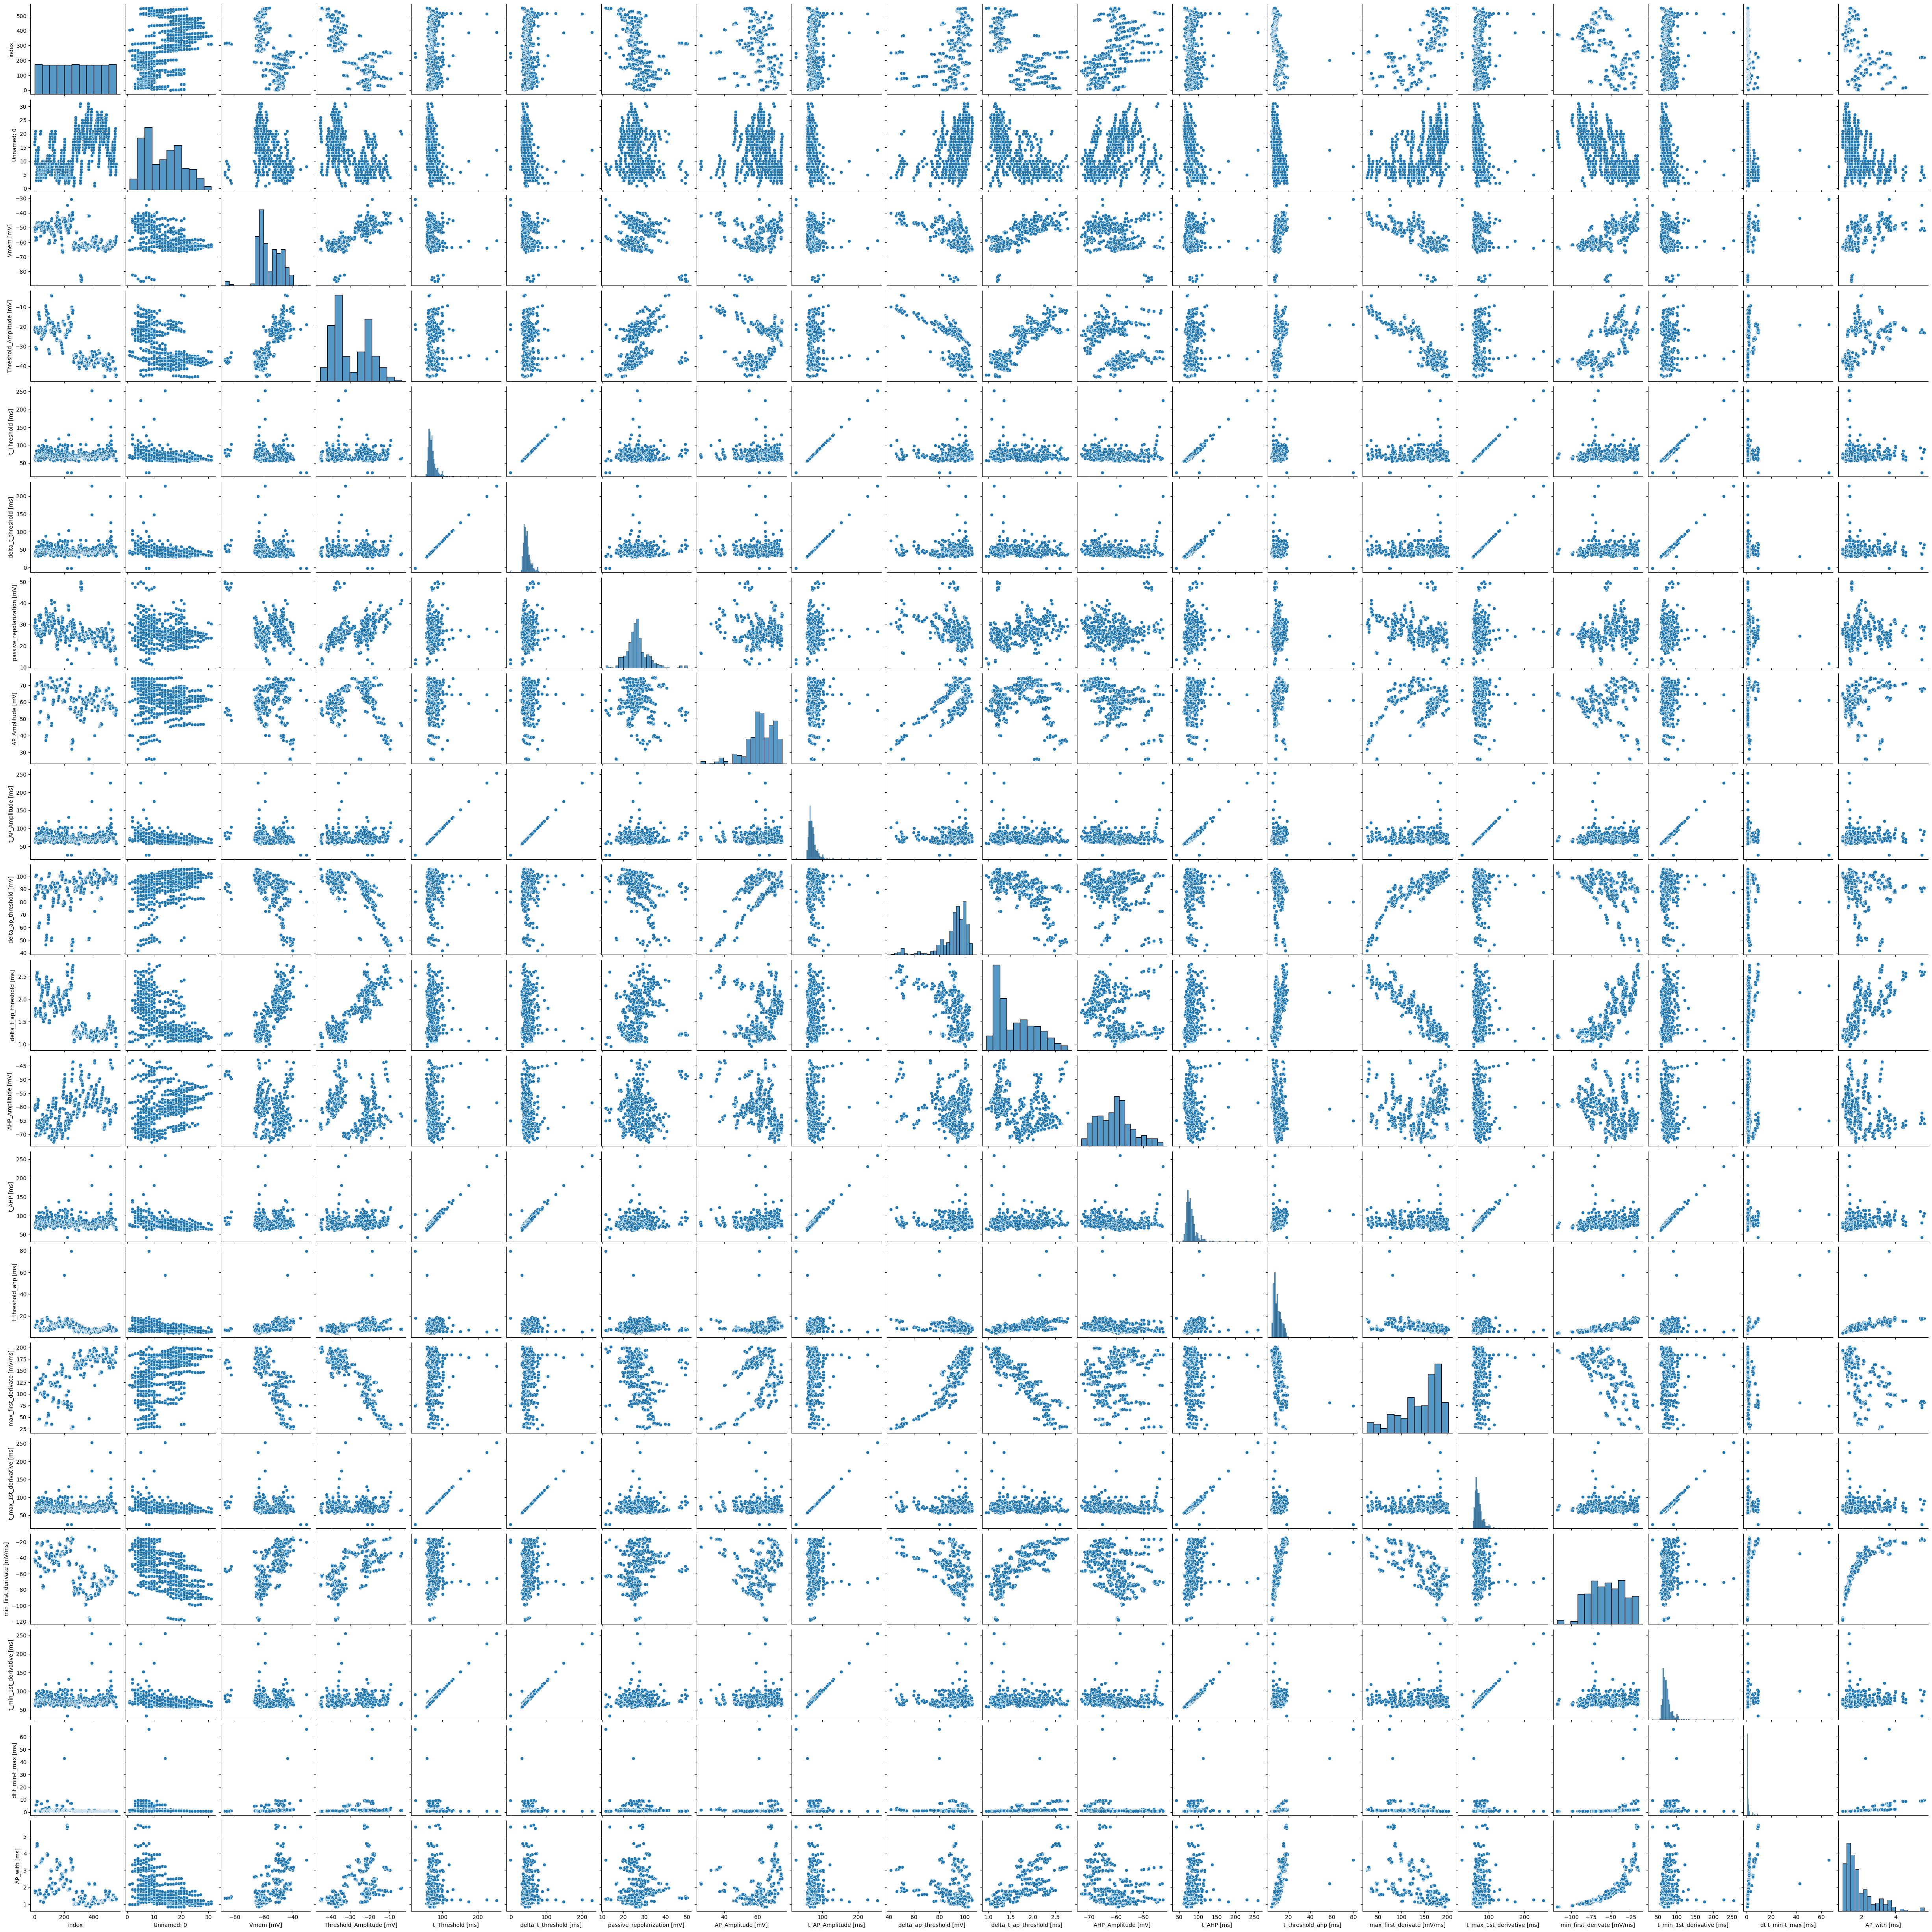

In [7]:
#lets make a simple correlation map to retrieve the correlated fetaures too
sns.pairplot(ap_data)

In [9]:
import numpy as np
corr_ap = ap_data.corr()
upper_tri = corr_ap.where(np.triu(np.ones(corr_ap.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)
ap_data_droped = ap_data.drop(to_drop,axis = 1)
ap_data_droped

['delta_t_threshold [ms]', 't_AP_Amplitude [ms]', 't_AHP [ms]', 't_max_1st_derivative [ms]', 't_min_1st_derivative [ms]']


/tmp/ipykernel_634718/1812451572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ap = ap_data.corr()


index  Unnamed: 0  Vmem [mV]  Threshold_Amplitude [mV]  t_Threshold [ms]  \
0        0          16 -50.502248                -21.093748            63.350   
1        1          17 -50.081064                -21.406253            63.800   
2        2          18 -52.393470                -20.062502            64.750   
3        3          19 -51.732562                -20.718750            61.650   
4        4          20 -50.616437                -22.281249            59.400   
..     ...         ...        ...                       ...               ...   
548    548           5 -57.508291                -44.187500            82.700   
549    549           6 -57.623406                -45.000002            62.400   
550    550           7 -56.512919                -44.531250            57.000   
551    551           8 -58.636040                -44.531248            57.375   
552    552           9 -56.067067                -44.500000            56.750   

     passive_repolarization [mV]  AP_Amplitude [mV]  delta_ap_threshold [mV]  \
0                      29.408500          63.375004                84.468752   
1                      28.674811          62.937498                84.343751   
2                      32.330968          62.093750                82.156251   
3                      31.013812          62.156249                82.874999   
4                      28.335188          63.343748                85.624997   
..                           ...                ...                      ...   
548                    13.320790          52.312501                96.500001   
549                    12.623404          53.312499                98.312501   
550                    11.981669          54.812498                99.343748   
551                    14.104792          56.312501               100.843750   
552                    11.567067          55.156250                99.656250   

     delta_t_ap_threshold [ms]  AHP_Amplitude [mV]  t_threshold_ahp [ms]  \
0                        1.700          -60.906248                10.200   
1                        1.700          -60.531251                10.500   
2                        1.700          -61.218752                10.150   
3                        1.700          -60.937500                10.125   
4                        1.775          -59.624999                10.425   
..                         ...                 ...                   ...   
548                      1.150          -62.093751                 7.900   
549                      1.150          -60.937501                 6.875   
550                      1.000          -60.468751                 6.675   
551                      0.950          -60.781248                 7.675   
552                      1.000          -60.437500                 6.800   

     max_first_derivate [mV/ms]  min_first_derivate [mV/ms]  \
0                        114.41                      -41.32   
1                        113.55                      -42.83   
2                        109.01                      -45.13   
3                        110.13                      -42.83   
4                        114.34                      -42.37   
..                          ...                         ...   
548                      191.71                      -61.97   
549                      189.34                      -62.37   
550                      196.32                      -63.82   
551                      201.71                      -63.55   
552                      196.97                      -62.70   

     dt t_min-t_max [ms]  AP_with [ms] experiment_name  
0                  1.275         1.800       140325_12  
1                  1.250         1.775       140325_12  
2                  1.250         1.700       140325_12  
3                  1.250         1.750       140325_12  
4                  1.200         1.800       140325_12  
..                   ...           ...             ...  
54

In [13]:
from scipy.stats import shapiro 
from scipy.stats import lognorm
# lets test for normality of the data using shapiro test
# not normally distributed most of the time therefore lets go for a tree based approach
results = [(i, shapiro(ap_data_droped[i])) for i in ap_data_droped.iloc[:,:-1].columns]
results

[('index',
  ShapiroResult(statistic=0.9547363519668579, pvalue=5.426435342736902e-12)),
 ('Unnamed: 0',
  ShapiroResult(statistic=0.9566745758056641, pvalue=1.1232574766151249e-11)),
 ('Vmem [mV]',
  ShapiroResult(statistic=0.9313626885414124, pvalue=3.094687388836316e-15)),
 ('Threshold_Amplitude [mV]',
  ShapiroResult(statistic=0.9271597266197205, pvalue=9.824707626631844e-16)),
 ('t_Threshold [ms]',
  ShapiroResult(statistic=0.624814510345459, pvalue=5.805783863784556e-33)),
 ('passive_repolarization [mV]',
  ShapiroResult(statistic=0.9280743598937988, pvalue=1.2560358289676033e-15)),
 ('AP_Amplitude [mV]',
  ShapiroResult(statistic=0.9256644248962402, pvalue=6.605834196299733e-16)),
 ('delta_ap_threshold [mV]',
  ShapiroResult(statistic=0.7950174808502197, pvalue=7.977825522805121e-26)),
 ('delta_t_ap_threshold [ms]',
  ShapiroResult(statistic=0.9111151695251465, pvalue=1.815524463444457e-17)),
 ('AHP_Amplitude [mV]',
  ShapiroResult(statistic=0.9765430092811584, pvalue=9.57282253

In [32]:
merged_data = pd.merge(ap_data_droped, 
                       meta_data, 
                       how = "left", 
                       left_on = "experiment_name", 
                       right_on = "experiment_name")
merged_data["class"] = [0 if i == "DRGs" else 1 for i in merged_data["celltype"]]


X = merged_data.iloc[:,2:-12]
Y = merged_data["class"]

/home/data-science/Desktop/AP_Model/.conda/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


Text(0.5, 1.0, 'PCA of Action Potential Markers')

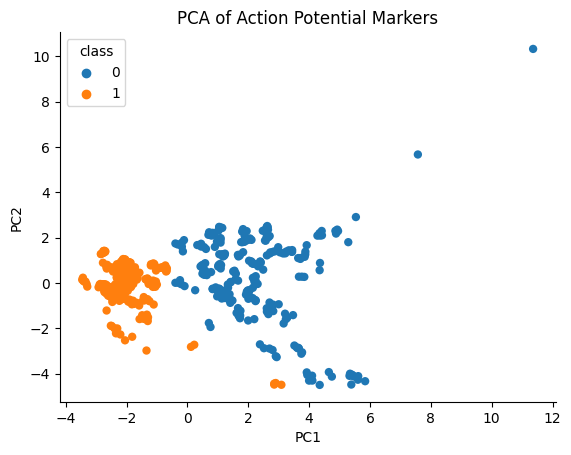

In [33]:
# pca indicates a good spplit fo the first and second principal component
# why do we have the two outliers?
# Where do the come from?
# class 0 is iPSC
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)
scaled_pca = pd.DataFrame(PCA(n_components=2).fit_transform(scaled_X_train), columns = ["PC1", "PC2"])
scaled_pca["class"] = Y
fig,ax = plt.subplots()
sns.despine()
sns.scatterplot(data = scaled_pca, 
                x = "PC1",
                y = "PC2",
                hue = "class",
                cmap = "viridis",
                linewidth = 0)
plt.title("PCA of Action Potential Markers")

In [34]:
# Here we shuffle the data and split the train test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42, shuffle = True
)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (442, 13)
Training Labels Shape: (442,)
Testing Features Shape: (111, 13)
Testing Labels Shape: (111,)


In [35]:
# check if shuffling was successful and how the weights are between the classes
# seems like more iPSC APs but lets try not to sample it 
y_train.value_counts()

1    243
0    199
Name: class, dtype: int64

In [36]:
# same for the test dataset
y_test.value_counts()

0    60
1    51
Name: class, dtype: int64

In [37]:
# Here we setup the random forest classifer 
# We use a grid search which enables us to retrieve the best parameter fit
from sklearn.model_selection import GridSearchCV
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }


clf = RandomForestClassifier(n_estimators=3,max_depth=2, random_state=0)
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=2, n_estimators=3,
                                              random_state=0),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [38]:
# retrieve the best estimator
clf = grid_clf. best_estimator_
print(clf)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        51

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



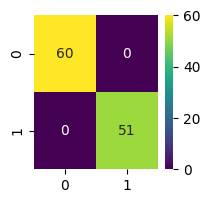

In [39]:
# check the predictions
# Build a confusion matrix
# this reveaeld that all are rightly predicted
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
fig,ax = plt.subplots(figsize = (2,2))
sns.heatmap(cm, annot=True, fmt='d', cmap = "viridis")
print(classification_report(y_test,predictions))

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=209652396)


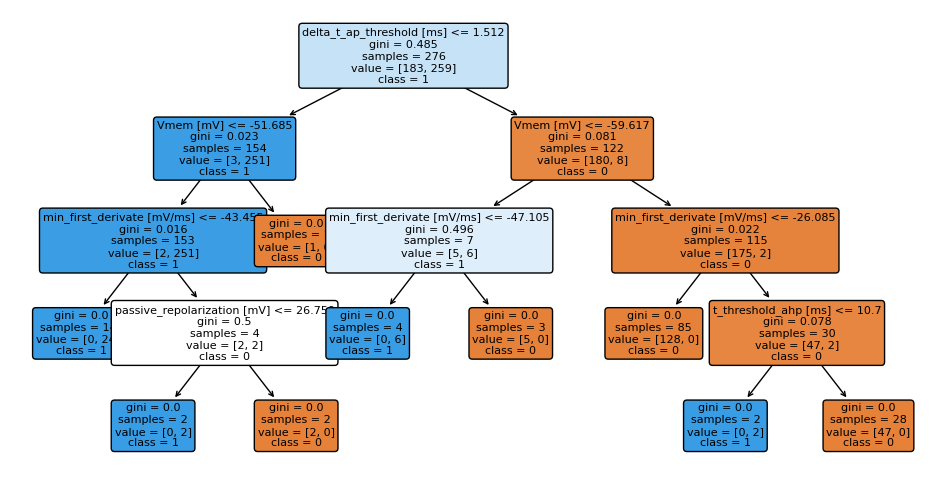

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=398764591)


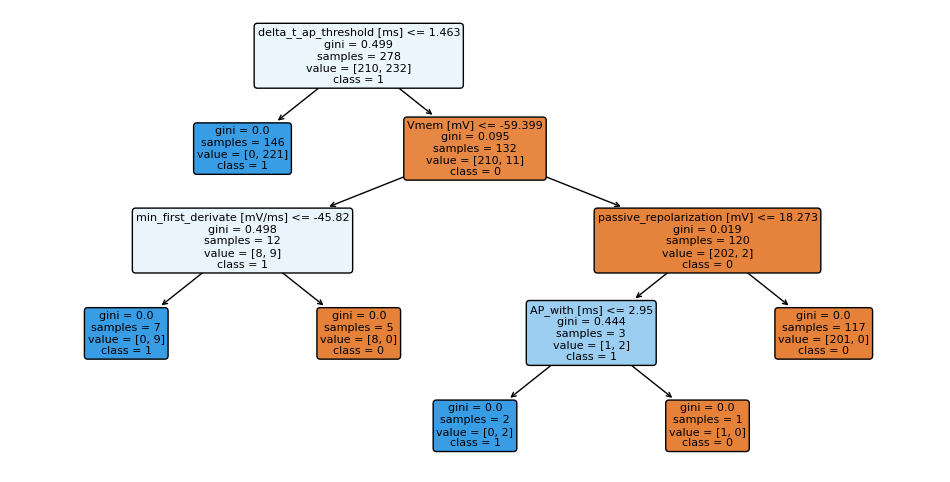

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=924231285)


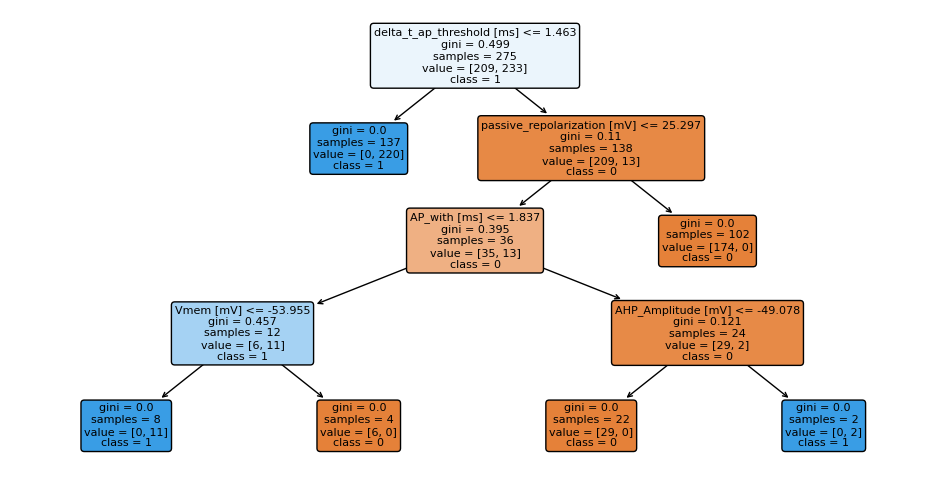

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1478610112)


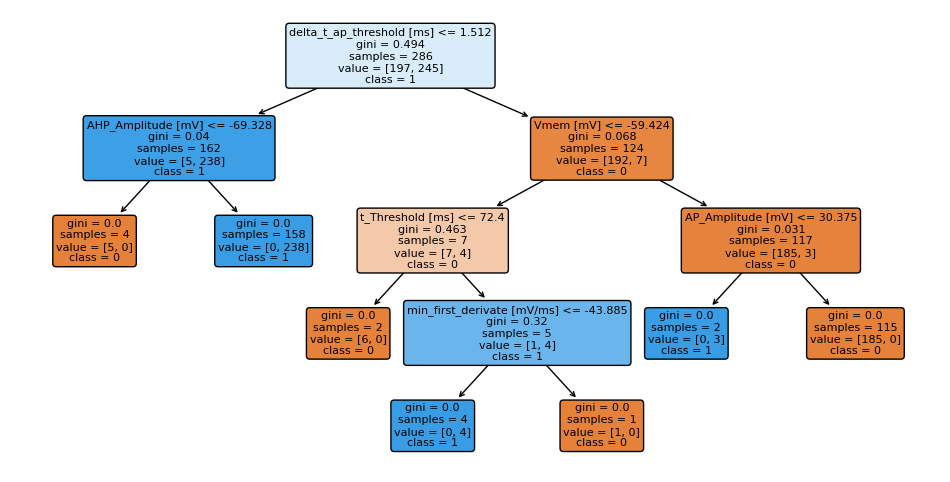

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=441365315)


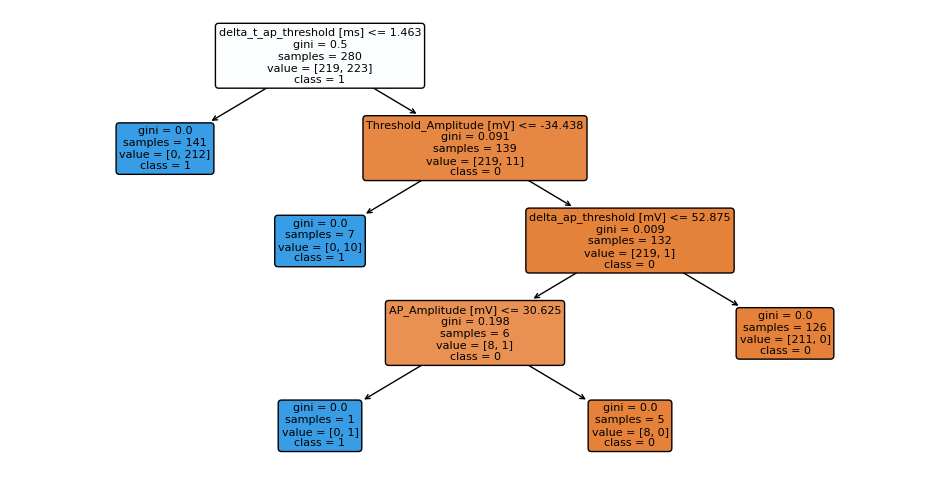

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1537364731)


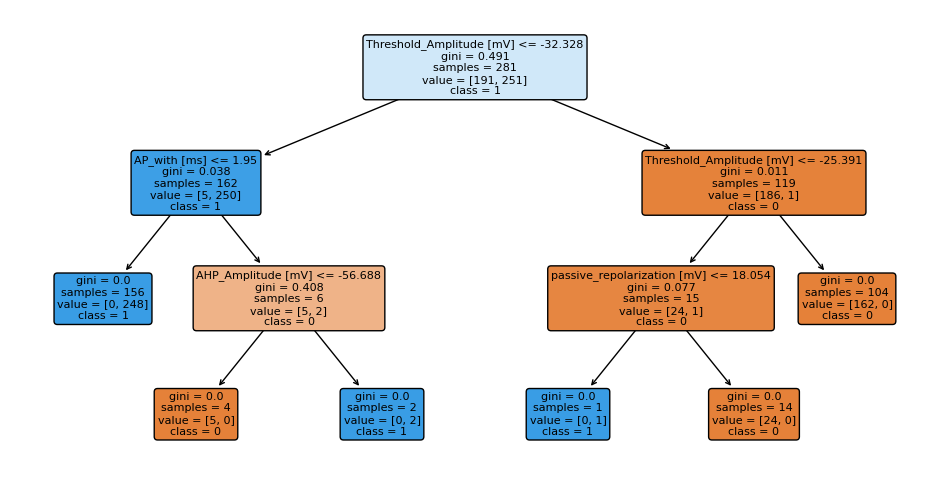

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=192771779)


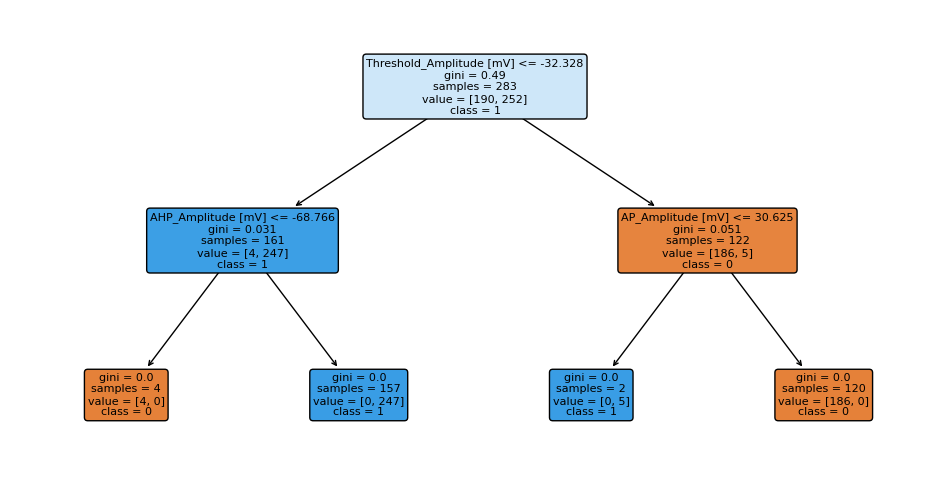

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1491434855)


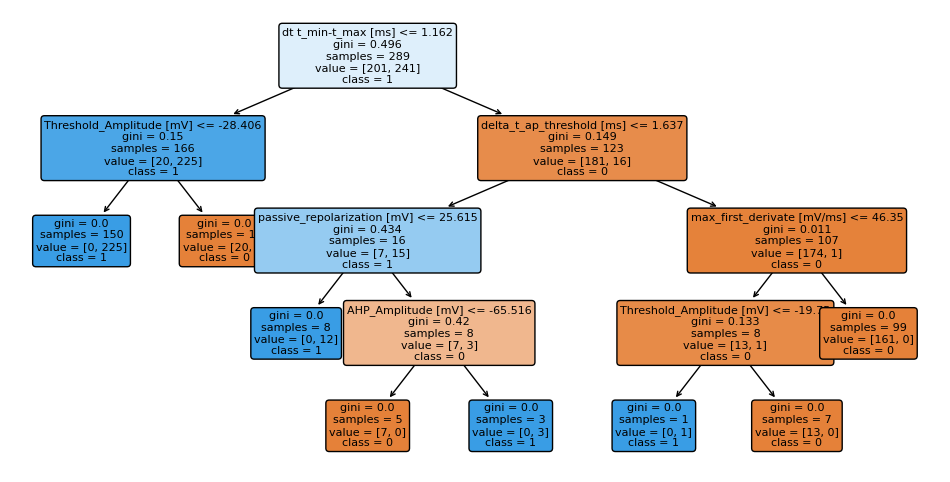

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1819583497)


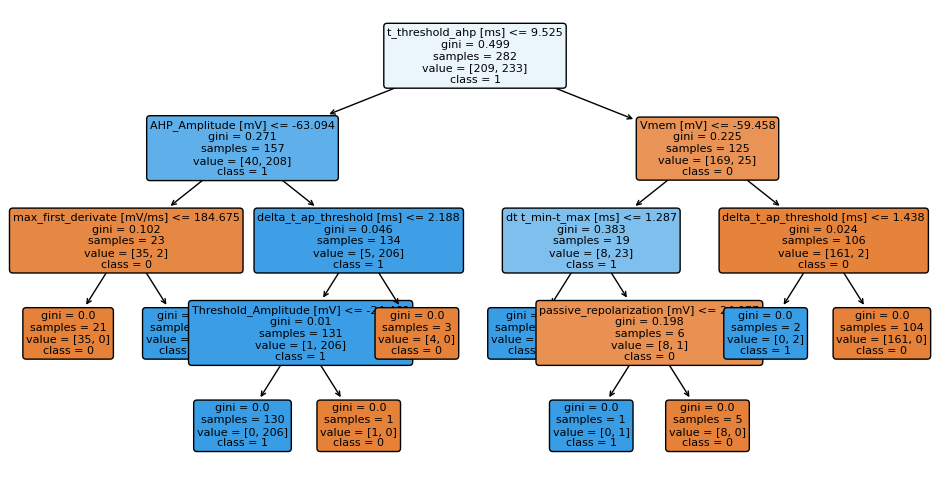

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=530702035)


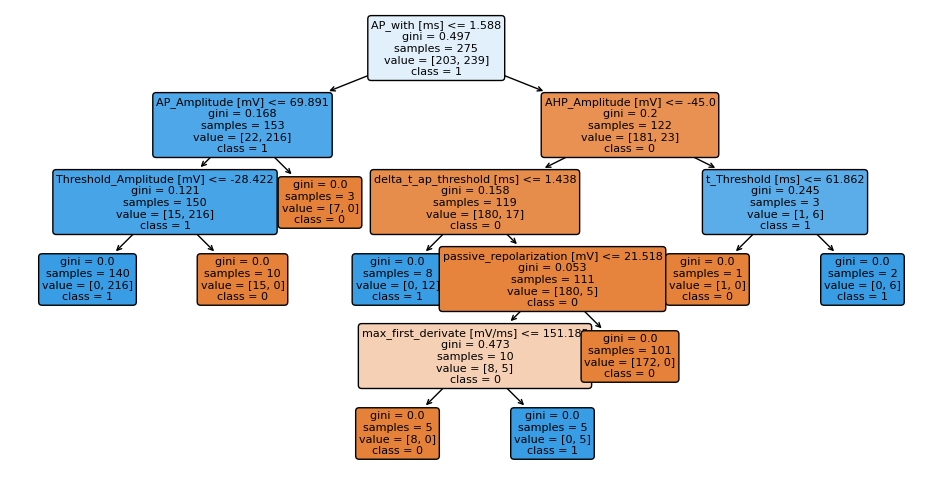

In [40]:
features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in clf.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

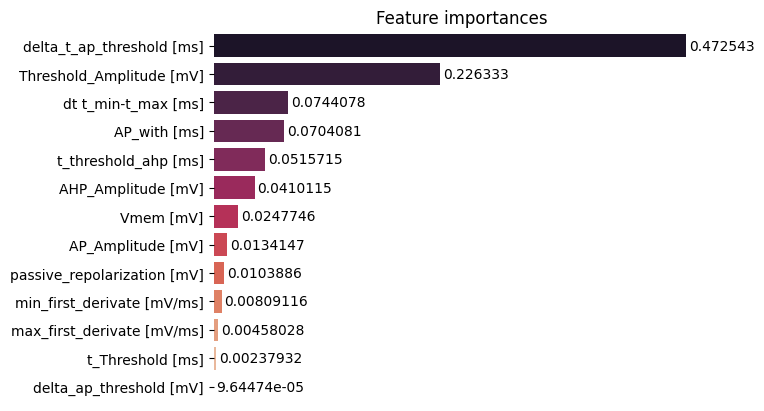

In [41]:
# Organizing feature names and importances in a DataFrame
# this retrieves the feature importance that we need
features_df = pd.DataFrame({'features': clf.feature_names_in_, 'importances': clf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)